# Music

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [17]:
import music21
from music21 import *
from IPython.display import Image, Audio

In [3]:
path = Path('data/composers/notewise/piano_solo/note_range38/sample_freq12')
path.ls()[:5]

[PosixPath('data/composers/notewise/piano_solo/note_range38/sample_freq12/jazz'),
 PosixPath('data/composers/notewise/piano_solo/note_range38/sample_freq12/ravel'),
 PosixPath('data/composers/notewise/piano_solo/note_range38/sample_freq12/bach'),
 PosixPath('data/composers/notewise/piano_solo/note_range38/sample_freq12/schumann'),
 PosixPath('data/composers/notewise/piano_solo/note_range38/sample_freq12/test1')]

In [4]:
bs=32

In [5]:
data = TextLMDataBunch.load(path, bs=bs)

It only contains one csv file, let's have a look at it.

In [6]:
t = data.train_ds[0][0]
t.text[:50], t.data

('xxbos wait25 wait25 wait25 wait25 wait25 wait25 wa',
 array([  2,  94,  94,  94, ...,   9,  53,   9, 109]))

In [7]:
learn = language_model_learner(data, drop_mult=1, clip=.5, bptt=200)

In [8]:
learn = learn.to_fp16()

In [ ]:
learn.lr_find(num_it=1000)

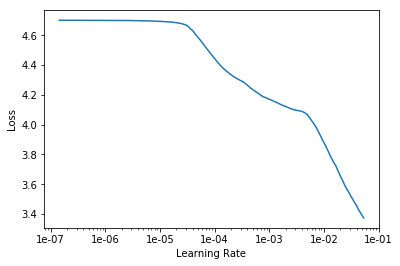

In [ ]:
learn.recorder.plot(skip_end=15)

In [ ]:
# From old code
# learner.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)    # Applying regularization
# learner.clip=0.3                                          # Clip the gradients  

In [12]:
learn.fit_one_cycle(1, 2e-3, moms=(0.7,0.5))

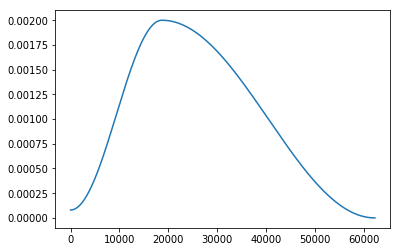

In [13]:
learn.recorder.plot_lr()

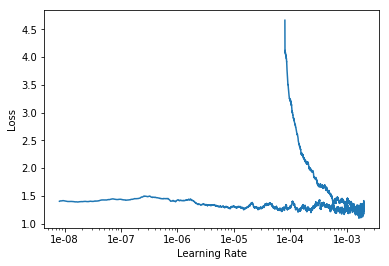

In [14]:
learn.recorder.plot()

In [15]:
learn.save('first_run')

In [9]:
learn.load('first_run');

### Run Overnight

In [10]:
learn.fit_one_cycle(7, 5e-4, moms=(0.7,0.5))

In [11]:
learn.save('second_run')

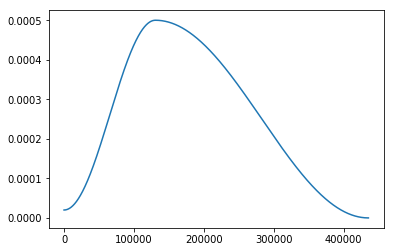

In [12]:
learn.recorder.plot_lr()

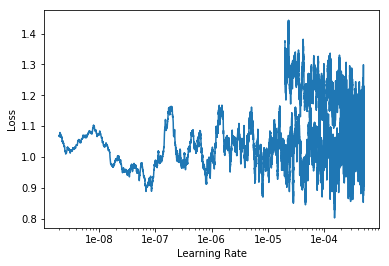

In [13]:
learn.recorder.plot()

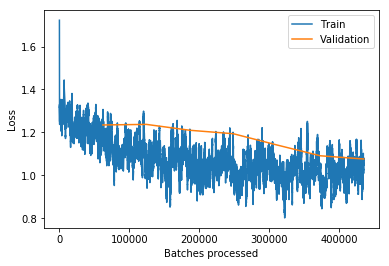

In [14]:
learn.recorder.plot_losses()

In [8]:
learn.load('second_run')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (1798 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: data/composers/notewise/piano_solo/note_range38/sample_freq12
x: LMTextList (1798 items)
[Text xxbos wait25 wait25 wait25 wait25 wait25 wait25 wait25 wait17 p17 p21 p23 p26 p29 wait3 p33 wait24 endp26 endp29 wait2 endp23 wait2 endp21 wait1 endp17 p26 endp33 wait2 endp26 wait6 p21 wait7 endp21 wait1 p14 p20 p22 p25 wait23 endp14 endp22 endp25 wait1 p19 p20 p24 p26 p31 wait23 endp20 endp24 endp31 wait1 p9 p16 p19 p23 p26 wait25 wait22 endp9 endp16 endp19 endp23 endp26 wait1 p13 p15 p17 p18 p22 p25 wait23 endp13 endp15 endp25 wait1 p8 p17 p18 p22 p27 wait23 endp18 endp22 endp27 wait1 p8 p13 p17 p24 p29 wait25 wait22 endp8 endp13 endp29 wait1 p14 p17 p21 p24 p28 p31 wait23 endp14 endp21 endp24 endp28 endp31 wait1 p7 p17 p20 p23 p25 p29 wait23 endp7 endp17 endp20 endp25 endp29 wait1 p12 p14 p16 p19 p23 wait25 wait22 endp12 endp14 endp16 endp19

## Done

In [15]:
out = learn.pred_batch()

In [16]:
learn.show_results(rows=5, max_len=25)

In [9]:
idx = 10
folder_idx = 2 # 2 = bach
seed_len = 250

file = path.ls()[folder_idx].ls()[idx]
with open(file, 'r') as f:
    txt_out = f.read()
notes = txt_out.split(' ')
seed = ' '.join(notes[:seed_len])

note_offset = 45 if 'note_range38' in str(file) else 33
sample_freq = 12 if 'sample_freq12' in str(file) else 4

note_offset, sample_freq, file

In [10]:
pred_out = learn.predict(seed, n_words=500)

### Testing

In [11]:
seed

'p18 p30 wait5 endp18 endp30 wait1 p29 wait2 endp29 wait1 p30 wait2 endp30 wait1 p17 p32 wait5 endp17 endp32 wait1 p30 wait2 endp30 wait1 p29 wait2 endp29 wait1 p15 p30 wait5 endp15 wait7 p10 wait2 endp30 wait1 p32 wait2 endp10 endp32 wait1 p29 wait2 endp29 wait1 p30 wait2 endp30 wait1 p11 p32 wait2 endp32 wait1 p25 wait2 endp11 endp25 wait1 p34 wait2 endp34 wait1 p25 wait2 endp25 wait1 p13 p35 wait2 endp35 wait1 p25 wait2 endp13 endp25 wait1 p37 wait5 endp37 wait1 p6 p34 endp34 p35 endp35 wait3 p32 p34 endp34 wait2 endp6 endp32 wait1 p18 p30 wait2 endp30 wait1 p32 wait2 endp18 endp32 wait1 p17 p34 wait2 endp34 wait1 p36 wait2 endp17 endp36 wait1 p15 p37 wait2 endp37 wait3 endp15 wait1 p13 p25 wait5 endp13 endp25 wait1 p24 p32 wait2 endp24 wait1 p25 wait2 endp25 wait1 p24 p27 wait2 endp32 wait3 endp24 endp27 wait1 p25 wait2 endp25 wait1 p24 wait2 endp24 wait1 p22 p25 p37 wait2 endp37 wait1 p36 wait2 endp22 endp36 wait1 p34 wait2 endp34 wait1 p32 wait2 endp32 wait1 p17 p37 wait2 endp25 

In [12]:
pred_only = pred_out.replace(seed, '').strip(); pred_only

'wait1 p25 wait2 endp25 wait1 p34 wait2 endp34 wait1 p25 p32 wait2 endp25 endp32 wait1 p27 p30 wait2 endp30 wait3 endp27 wait1 p29 wait2 endp29 wait1 p25 wait2 endp25 wait1 p18 wait5 endp18 wait1 p30 wait5 endp30 wait7 p27 p30 wait5 endp27 endp30 wait1 p25 p29 p37 wait2 endp37 wait3 endp25 endp29 wait1 p27 p30 wait5 endp27 endp30 wait1 p20 p32 wait5 endp20 wait1 p22 p25 wait2 endp32 wait1 p30 wait2 endp22 endp25 endp30 wait1 p20 p24 p29 wait2 endp29 wait1 p27 wait2 endp24 endp27 wait1 p25 p29 wait2 endp29 wait1 p32 wait2 endp20 endp25 endp32 wait1 p22 p27 p37 wait5 endp22 endp27 wait1 p20 p36 wait2 endp36 wait1 p34 endp37 wait2 endp20 endp34 wait1 p18 p36 wait2 endp36 wait1 p34 wait2 endp18 endp34 wait1 p17 p32 wait2 endp32 wait1 p30 wait2 endp17 endp30 wait1 p13 p29 wait2 endp29 wait1 p29 wait2 endp13 endp29 wait1 p12 p27 wait2 endp27 wait1 p29 wait2 endp13 endp29 wait1 p12 p37 wait2 endp37 wait1 p29 wait2 endp12 endp29 wait1 p24 p27 wait2 endp27 wait1 p29 wait2 endp24 endp29 wait1 p2

### Generate from predictions

In [13]:
from utils import *

In [14]:
pred_format = pred_only.replace('xxbos ', '')

In [21]:
note_stream = arrToStreamNotewise(seed.split(' '), sample_freq=sample_freq, note_offset=45)

In [22]:
note_stream

<music21.stream.Stream 0x7fec9ca904e0>

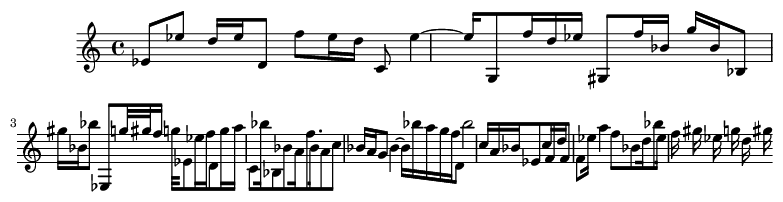

In [23]:
Image(filename=str(note_stream.write('lily.png')))

In [24]:
note_stream.show('midi')

### Old way

In [27]:
out_dir = Path('tmp_out')
tmp_file = 'testfile.mid'
midi_file = out_dir/tmp_file
if midi_file.exists(): midi_file.unlink()

In [32]:
result = write_mid_mp3_wav(pred_format, fname=tmp_file, 
                           sample_freq=sample_freq, note_offset=note_offset, 
                           out=out_dir, chordwise=False)

In [34]:
mf = midi.MidiFile()
mf.open(midi_file)
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)

In [35]:
s.show('midi')

In [36]:
Image(filename=str(s.write('lily.png')))

LilyTranslateException: Cannot translate an object of zero duration <music21.duration.Duration 0.0>

In [182]:
%debug

> /home/ubuntu/anaconda3/envs/musical_neural_net/lib/python3.7/site-packages/music21/lily/translate.py(1289)lySimpleMusicFromNoteOrRest()
   1287             simpleElementParts.append("s ")
   1288         elif 'Rest' in c:
-> 1289             if noteOrRest.hasStyleInformation and noteOrRest.hideObjectOnPrint:
   1290                 simpleElementParts.append("s ")
   1291             else:

ipdb> noteOrRest
<music21.note.Rest rest>
ipdb> noteOrRest.hasStyleInformation
True
ipdb> noteOrRest.hideObjectOnPrint
*** AttributeError: 'Rest' object has no attribute 'hideObjectOnPrint'
ipdb> quit


### Previous notebook cells

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

In [ ]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [ ]:
learn.load('fine_tuned');

In [ ]:
TEXT = "i liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

i liked this movie because it was clearly a movie . xxmaj so i gave it a 2 out of 10 . xxmaj so , just say something . xxbos xxmaj this is a really stunning picture , light years off of the late xxmaj
i liked this movie because it would be a good one for those who like deep psychological and drama and you can go see this movie if you like a little slow motion and some magic should n't be there . i would give it


We have to save the model but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [ ]:
learn.save_encoder('fine_tuned_enc')